<a href="https://colab.research.google.com/github/JinKim1/classMachineLearning/blob/master/ML_assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning note for DongJin

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

x  = data[:, 0]
y  = data[:, 1]
l   = data[:, 2]

x_0 = x[l == 0]
y_0 = y[l == 0]

x_1 = x[l == 1]
y_1 = y[l == 1]

# plt.figure(figsize=(8, 8))
# plt.scatter(x_0, y_0,alpha=0.5,s=30, c='b')
# plt.scatter(x_1, y_1,alpha=0.5,s=39, c='r')
# plt.title('Training Data',fontsize=18)
# plt.show()

In [0]:
n_data = len(x)              # 데이터 수
lter_num = 200000            # 반복 수
learning_rate = 0.01         # 러닝레이트

def s(z):
    return 1 / (1+np.exp(-z))

w1_guess = np.array(range(lter_num),dtype=float)     # 변수 저장용 배열 선언
w2_guess = np.array(range(lter_num),dtype=float)
w3_guess = np.array(range(lter_num),dtype=float)
w4_guess = np.array(range(lter_num),dtype=float)
w5_guess = np.array(range(lter_num),dtype=float)
w6_guess = np.array(range(lter_num),dtype=float)
w7_guess = np.array(range(lter_num),dtype=float)
w8_guess = np.array(range(lter_num),dtype=float)
w9_guess = np.array(range(lter_num),dtype=float)
b_guess = np.array(range(lter_num),dtype=float)
cost_guess = np.array(range(lter_num),dtype=float)
training_accuracy = np.array(range(lter_num),dtype=float)

W1 = 0.0     # 초기값 설정
W2 = 0.0
W3 = 0.0
W4 = 0.0
W5 = 0.0
W6 = 0.0
W7 = 0.0
W8 = 0.0
W9 = 0.0
b = 0.0      # 초기값 설정

for i in range(0,lter_num):
    z = W1*x*x*x + W2*x*x*y + W3*x*y*y + W4*y*y*y + W5*x*x + W6*x*y + W7*y*y + W8*x + W9*y + b   # 예측함수
    cost = np.sum(  -l*np.log(s(z)) - (1-l)*np.log(1-s(z))  )/n_data

    good = 0
    for j in range(0,n_data):
        if(z[j]>0):
            if(l[j]==1):
                good+=1
        if(z[j]<0):
            if(l[j]==0):
                good+=1
    training_accuracy[i] = good/n_data       # 정확도 측정

    w1_guess[i] = W1                         # 반복마다 값들 저장
    w2_guess[i] = W2
    w3_guess[i] = W3
    w4_guess[i] = W4
    w5_guess[i] = W5
    w6_guess[i] = W6
    w7_guess[i] = W7
    w8_guess[i] = W8
    w9_guess[i] = W9
    b_guess[i] = b
    cost_guess[i] = cost

    gradient_w1 = np.sum((s(z)-l)*x*x*x)/n_data
    gradient_w2 = np.sum((s(z)-l)*x*x*y)/n_data
    gradient_w3 = np.sum((s(z)-l)*x*y*y)/n_data
    gradient_w4 = np.sum((s(z)-l)*y*y*y)/n_data
    gradient_w5 = np.sum((s(z)-l)*x*x)/n_data
    gradient_w6 = np.sum((s(z)-l)*x*y)/n_data
    gradient_w7 = np.sum((s(z)-l)*y*y)/n_data
    gradient_w8 = np.sum((s(z)-l)*x)/n_data
    gradient_w9 = np.sum((s(z)-l)*y)/n_data
    gradient_b = np.sum((s(z)-l))/n_data            # b에 대해 편미분

    W1 -= learning_rate * gradient_w1               # 러닝레이트에 따라 경사도를 따라 값을 변화시킨다
    W2 -= learning_rate * gradient_w2
    W3 -= learning_rate * gradient_w3
    W4 -= learning_rate * gradient_w4
    W5 -= learning_rate * gradient_w5
    W6 -= learning_rate * gradient_w6
    W7 -= learning_rate * gradient_w7
    W8 -= learning_rate * gradient_w8
    W9 -= learning_rate * gradient_w9
    b -= learning_rate * gradient_b

# print(W1,W2,W3,W4,W5,b)  # 학습 후 W1,W2,W3,b 값 확인
# print(cost)  # 학습 후 cost값 확인

=====================     **RESULTS**     =====================

**1. Plot the training data**

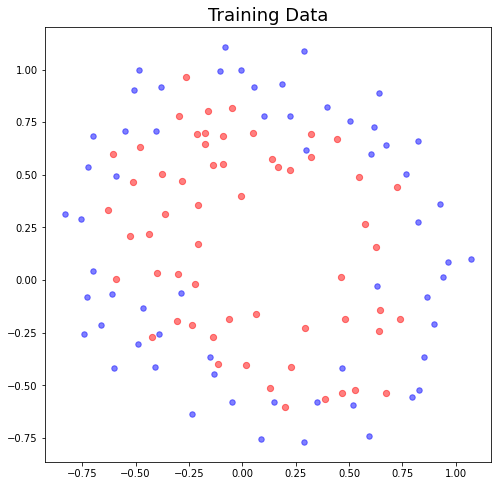

In [229]:
plt.figure(figsize=(8, 8))
plt.scatter(x_0, y_0,alpha=0.5,s=30, c='b')
plt.scatter(x_1, y_1,alpha=0.5,s=39, c='r')
plt.title('Training Data',fontsize=18)
plt.show()

**2. Write down the high dimensional function**

$g(x,y;θ)$ = $θ_0$$x^3$ + $θ_1$$x^2y$ + $θ_2$$xy^2$ + $θ_3$$y^3$ + $θ_4$$x^2$ + $θ_5$$xy$ + $θ_6$$y^2$ + $θ_7$$x$ + $θ_8$$y$ + $θ_9$

**3. Plot the training error**

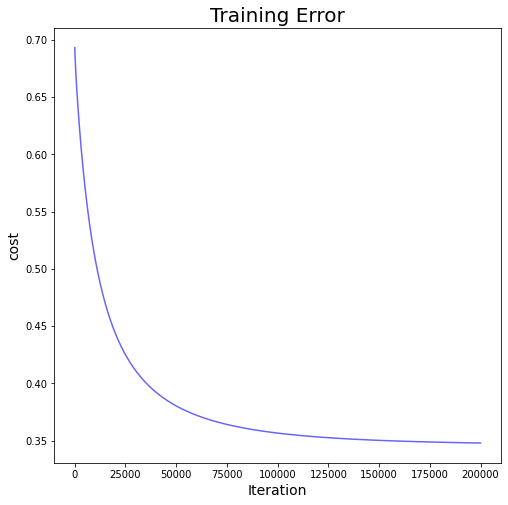

In [230]:
lter = np.array(range(lter_num))
plt.figure(figsize=(8, 8))
plt.plot(lter, cost_guess,alpha=0.6,color='b')
plt.title('Training Error',fontsize=20)
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('cost',fontsize=14)
plt.show()

**4. Plot the training accuracy**

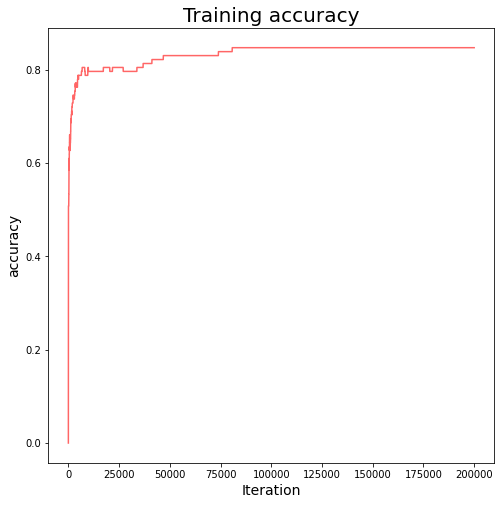

0.847457627118644


In [231]:
plt.figure(figsize=(8, 8))
plt.plot(lter, training_accuracy,alpha=0.6,color='r')
plt.title('Training accuracy',fontsize=20)
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.show()
print(training_accuracy[199999])

**5. Write down the final training accuracy**

Final training accuracy = 84.75%

**6. Plot the optimal classifier superimposed on the training data**

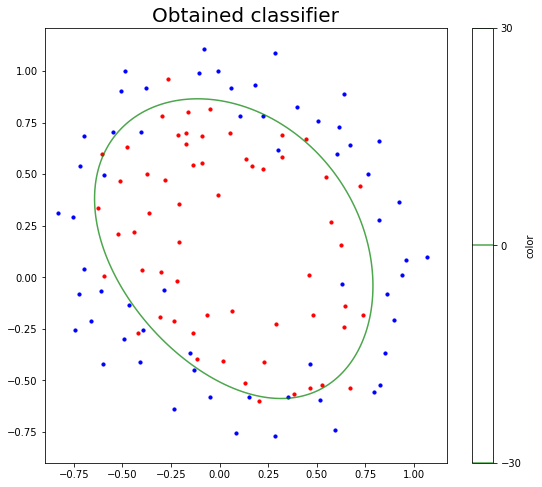

In [233]:
x_g = np.arange(-0.9,1,0.01)
y_g = np.arange(-0.9,1,0.01)
x_g,y_g = np.meshgrid(x_g,y_g)

plt.figure(figsize=(9, 8))
plt.contour(x_g, y_g,W1*x_g*x_g*x_g + W2*x_g*x_g*y_g + W3*x_g*y_g*y_g + W4*y_g*y_g*y_g + W5*x_g*x_g + W6*x_g*y_g + W7*y_g*y_g + W8*x_g + W9*y_g + b,colors="g",levels=[-30,0,30],alpha=0.7,linestyles=["--","-","--"])

plt.colorbar(label='color')
plt.scatter(x_0, y_0, s=10,alpha=1, c='b')
plt.scatter(x_1, y_1, s=10,alpha=1, c='r')
plt.title('Obtained classifier',fontsize=20)
plt.show()